# Analytics - Product Quality

#### Date: 2020/02

#### SUMMARY:

- De acordo com os dados compilados abaixo, podemos perceber que:
  - O microsserviço de backend que apresenta o pior indicador de manutenibilidade é o FishLogs. Isso se deve ao fato dele ter sido o serviço mais alterado este semestre. E como não houveram novos testes, e tiveram novas linhas de código para ser testadas, sua manutenibilidade foi afetada.
  - O serviço com a pior confiabilidade foi o UserInterface. Este é o serviço com a qualidade mais afetada do projeto. Ele é um aplicativo React Native que tem seu compilador o Expo. Por conta disso a aplicação muitas vezes não conseguia ser buildada para testes, não era possível sua automatização de pipeline com apk's e a aplicação se mantia pesada. A aplicação por si está pesada, com estados internos mal geridos e confusa no código.
  - Tirando a Aplicação mobile, a qualidade do projeto se encontra satisfatória. Mais testes são necessários e métricas como test_errors e test_failures devem ser exportadas a partir dos próximos builds.
  - O time EuPescador 2022/1 fortemente aconselha futuros alunos que trabalharão nesta aplicação tirarem um tempo considerável para refazer a aplicação mobile ou ao menos retirar o expo e melhorar seu código.

### TEAM: EUPESCADOR

##### Semester: 2022/01
##### Professor: Hilmer Neri

##### Members:

- André Aben-Athar de Freitas
- Lucas Ganda Carvalho
- Ailamar Alves
- Joao Gabriel A


### LIBRARIES

In [55]:
# Deal with data
import pandas as pd
import json
from glob import glob
import os
import re

# Deal with visualization
import matplotlib.pyplot as plt

# Deal with time
import datetime

### GRAPH SETTINGS

In [56]:
fig = plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

### DATAFRAME SETTINGS

In [57]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

#### Replace your semester, project name, repository name, and the programming language extension

In [58]:
language = [['fga-eps-mds-2022.1-EuPescador-UserInterface', 'ts'],
            ['fga-eps-mds-2022.1-EuPescador-FishLog', 'ts'],
            ['fga-eps-mds-2022.1-EuPescador-Web', 'ts'],
            ['fga-eps-mds-2022.1-EuPescador-User', 'ts'],
            ['fga-eps-mds-2022.1-EuPescador-FishWiki', 'ts'],
           ]

repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

### SonarCloud

##### Path to the folder with all your jsons

In [59]:
jsons = glob('./documents/*.json') # add your path here
print(jsons)

['./documents/fga-eps-mds-2022.1-EuPescador-FishWiki-07-31-2022-22:33:04-v1.2.0.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-09-2022-16:24:07-main.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-18-2022-16:03:36-main.json', './documents/fga-eps-mds-2022.1-EuPescador-UserInterface-09-02-2022-12:37:50-devel.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-17-2022-03:02:59-main.json', './documents/fga-eps-mds-2022.1-EuPescador-FishLog-07-31-2022-22:25:11-v2.3.0.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-14-2022-09:39:26-main.json', './documents/fga-eps-mds-2022.1-EuPescador-UserInterface-09-18-2022-01:53:44-devel.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-13-2022-14:38:38-main.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-17-2022-09:44:30-v1.6.0.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-18-2022-12:11:47-main.json', './documents/fga-eps-mds-2022.1-EuPescador-Web-09-14-2022-14:59:56-main.json', './documents/f

In [60]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2022.1-(.*?)-(.*?):(.*?):(.*?)-(.*?).json", expand=True)

    df['repository'] = aux_df[2]

    df['version'] = aux_df[5]

    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [61]:
base_component_df = create_base_component_df(jsons)

In [62]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
50,duplicated_lines_density,5.5,False,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
51,functions,19,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
52,test_execution_time,115,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
53,security_rating,1.0,True,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
54,tests,23,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
55,files,9,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
56,complexity,52,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
57,ncloc,357,NaN,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
58,coverage,77.4,False,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0
59,reliability_rating,1.0,True,fga-eps-mds-2022.1-EuPescador-FishLog-07-31-20...,FishLog-07-31-2022-22,v2.3.0


#### Create dataframe per file

In [63]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'tests',
               'test_errors',
               'test_failures',
               'test_execution_time',
               'security_rating']

len(metric_list)

12

In [64]:
def get_files_df(df):
    
    files = df[df['qualifier'] == 'FIL'] 
    
    files = files.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])
    
    return files

In [65]:
def get_dir_df(df):
    dirs = df[df["qualifier"] == "DIR"]     

    newdf = pd.to_numeric(dirs["tests"])
    
    max_value_index = newdf.idxmax()            
    
    return dirs.loc[max_value_index]

In [66]:
def get_uts_df(df):
    dirs = df[df['qualifier'] == 'UTS']     

    dirs = dirs.dropna(subset=['test_execution_time'])          
    
    return dirs

In [67]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        
        ncloc_value = 0;
        
        for valores in component['measures']:

            if valores['metric'] == 'ncloc':
                ncloc_value = float(valores['value'])
                break
    
        if (component['qualifier'] == 'FIL') & (ncloc_value > 0) or (component['qualifier'] == 'DIR') or (component['qualifier'] == 'UTS'):                       
            file_json.append(component)

    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    df2 = pd.DataFrame(columns = df_columns)
    df3 = pd.DataFrame(columns = df_columns)
    
    
    for file in json:
        try:
                if file['qualifier'] == 'FIL' and file['language'] == language_extension:
                    for measure in file['measures']:
                        df.at[file['path'], measure['metric']] = measure['value']

                    df['qualifier'] = file['qualifier'] 

                elif file['qualifier'] == 'UTS':  
                    for measure in file['measures']:
                        df3.at[file['path'], measure['metric']] = measure['value']

                    df3['qualifier'] = file['qualifier'] 
                elif file['qualifier'] == 'DIR':
                    for measure in file['measures']:
                        df2.at[file['path'], measure['metric']] = measure['value']
                    df2['qualifier'] = file['qualifier'] 
        except:
            pass

    df.reset_index(inplace = True)
    df2.reset_index(inplace = True)
    df3.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df2 = df2.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)
    df3 = df3.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    dfFinal = pd.concat([df,df2,df3], axis=0)

    return dfFinal

def create_file_df(json_list):
    
    df = pd.DataFrame()
    dfDir = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)
                        
        file_name = os.path.basename(i)

        file_repository = re.split(r'-(\d+-\d+-\d+-\d+:\d+:\d+)-(.*?).json', file_name)[0]

        file_language = repos_language[f"{file_repository}"]

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = file_language)
        
        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # Replace the UnB semester with yours.
    
    aux_df = df['filename'].str.split(r"-(\d+-\d+-\d+-\d+:\d+:\d+)-(.*?).json", expand=True)

    df['repository'] = aux_df[0]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['version'])
    
    return df

In [68]:
file_component_df = create_file_df(jsons)
file_component_df.repository.unique()

array(['fga-eps-mds-2022.1-EuPescador-UserInterface',
       'fga-eps-mds-2022.1-EuPescador-Web',
       'fga-eps-mds-2022.1-EuPescador-FishWiki',
       'fga-eps-mds-2022.1-EuPescador-FishLog',
       'fga-eps-mds-2022.1-EuPescador-User'], dtype=object)

#### Removing NaN

In [69]:
file_component_df = file_component_df.dropna(subset=['functions', 'complexity','comment_lines_density', 'duplicated_lines_density', 'coverage' ])

        #### Create dataframe per repository

In [70]:
# Example. You must replace repo1, repo1,..., for your repository's names

repo1_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-UserInterface']
repo2_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-Web']
repo3_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-FishWiki']
repo4_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-FishLog']
repo5_df = file_component_df[file_component_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-User']


In [71]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        n = 0
        # try to cast the current ncloc value to int, if the value is NaN/Null, consider it as zero.
        try:
            n = int(each)
        except ValueError:
            n = 0
        ncloc += n

    return ncloc

### Measure calculations according Q-Rapids quality model

# Quality Aspect - Maintainability
## Factor - Code Quality

##### COMPLEXITY

In [72]:
def m1(df):

    files_df = get_files_df(df)
    
    density_non_complex_files = len(files_df[(files_df['complexity'].astype(float) /
                                              files_df['functions'].astype(float)) < 10]) / len(files_df)
    
    return density_non_complex_files

##### COMMENTS

In [73]:
def m2(df):

    files_df = get_files_df(df)
    
    density_comment_files = len(files_df[(files_df['comment_lines_density'].astype(float) > 10) &
                                         (files_df['comment_lines_density'].astype(float) < 30)]) / len(files_df)
    
    return density_comment_files

##### DUPLICATIONS

In [74]:
def m3(df):

    files_df = get_files_df(df)
    
    duplication = len(files_df[(files_df['duplicated_lines_density'].astype(float) < 5)])/len(files_df)
    
    return duplication

# Quality Aspect - Reliability
## Factor - Testing Status

##### Passed tests

In [75]:
def m4(df):
    try:

        dir_df = get_dir_df(df)
        passed_tests = (float(dir_df['tests']) - (float(dir_df['test_errors']) + float(dir_df['test_failures']))) /\
                   float(dir_df['tests'])
    except:
        passed_tests=0;
    return passed_tests

##### Fast test builds

In [76]:
def m5(df):

    dir_df = get_uts_df(df)
    try:
        density_fast_test_builds = len(dir_df[(dir_df['test_execution_time'].astype(float)) < 300000]) /\
                               len(dir_df['test_execution_time'].astype(float))
    except:
        density_fast_test_builds=0    
    return density_fast_test_builds

##### Test coverage

In [77]:
def m6(df):

    files_df = get_files_df(df)
    try:
        density_test_coverage = len(files_df[(files_df['coverage'].astype(float) > 60)]) / len(files_df)
    except:
        density_test_coverage=0
    return density_test_coverage

### Calculate m1, m2, m3, m4, m5 and m6 for each repository

In [78]:
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    m4_list = []
    m5_list = []
    m6_list = []

    ncloc_list = []
    repository_list = []
    version_list = []
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        m4_list.append(m4(version_df))
        m5_list.append(m5(version_df))
        m6_list.append(m6(version_df))

        ncloc_list.append(_ncloc(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'm4': m4_list,
                               'm5': m5_list,
                               'm6': m6_list,
                               'repository': repository_list, 
                               'version': version_list,
                               'ncloc': ncloc_list})
        
    return metrics_df

In [79]:
repo1 = create_metrics_df(repo1_df)
repo2 = create_metrics_df(repo2_df)
repo3 = create_metrics_df(repo3_df)
repo4 = create_metrics_df(repo4_df)
repo5 = create_metrics_df(repo5_df)


### Data visualization

- You must do this for each of your repositories

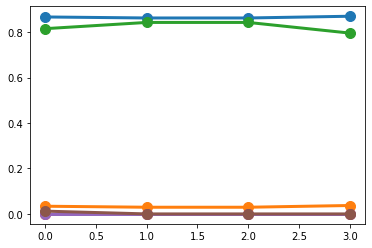

In [80]:
plt.plot(repo1['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1['m6'], linewidth=3, marker='o', markersize=10)

Ellipsis

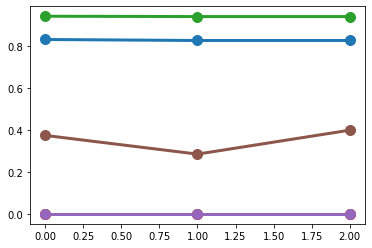

In [81]:

plt.plot(repo2['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo2['m6'], linewidth=3, marker='o', markersize=10)

...

Ellipsis

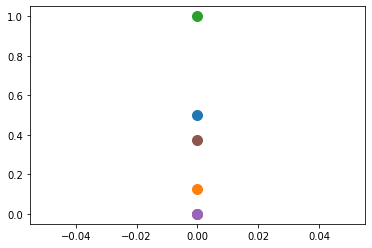

In [82]:

plt.plot(repo3['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo3['m6'], linewidth=3, marker='o', markersize=10)

...

Ellipsis

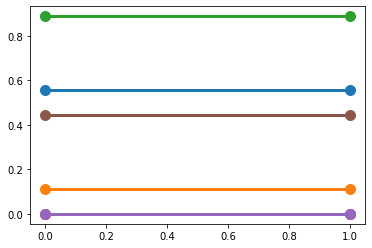

In [83]:

plt.plot(repo4['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo4['m6'], linewidth=3, marker='o', markersize=10)

...

Ellipsis

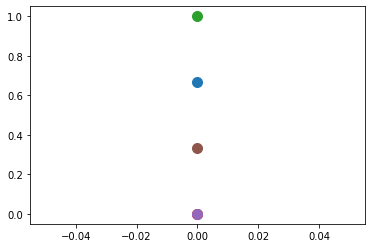

In [84]:

plt.plot(repo5['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo5['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo5['m3'], linewidth=3, marker='o', markersize=10)
plt.plot(repo5['m4'], linewidth=3, marker='o', markersize=10)
plt.plot(repo5['m5'], linewidth=3, marker='o', markersize=10)
plt.plot(repo5['m6'], linewidth=3, marker='o', markersize=10)

...

### Quality factor and aspect aggregation

- You must do this for each of your repositories

In [85]:
psc1 = 1
psc2 = 1
pc1 = 0.5
pc2 = 0.5
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33
pm4 = 0.25
pm5 = 0.25
pm6 = 0.5

repo1['code_quality'] = ((repo1['m1']*pm1) + (repo1['m2']*pm2) + (repo1['m3']*pm3)) * psc1
repo2['code_quality'] = ((repo2['m1']*pm1) + (repo2['m2']*pm2) + (repo2['m3']*pm3)) * psc1
repo3['code_quality'] = ((repo3['m1']*pm1) + (repo3['m2']*pm2) + (repo3['m3']*pm3)) * psc1
repo4['code_quality'] = ((repo4['m1']*pm1) + (repo4['m2']*pm2) + (repo4['m3']*pm3)) * psc1
repo5['code_quality'] = ((repo5['m1']*pm1) + (repo5['m2']*pm2) + (repo5['m3']*pm3)) * psc1

repo1['testing_status'] = ((repo1['m4']*pm4) + (repo1['m5']*pm5) + (repo1['m6']*pm6)) * psc2
repo2['testing_status'] = ((repo2['m4']*pm4) + (repo2['m5']*pm5) + (repo2['m6']*pm6)) * psc2
repo3['testing_status'] = ((repo3['m4']*pm4) + (repo3['m5']*pm5) + (repo3['m6']*pm6)) * psc2
repo4['testing_status'] = ((repo4['m4']*pm4) + (repo4['m5']*pm5) + (repo4['m6']*pm6)) * psc2
repo5['testing_status'] = ((repo5['m4']*pm4) + (repo5['m5']*pm5) + (repo5['m6']*pm6)) * psc2

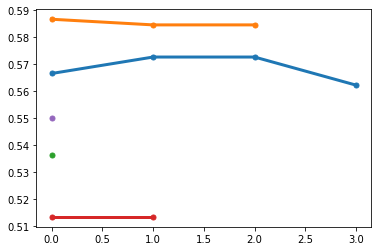

In [86]:
plt.plot(repo1['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo4['code_quality'], linewidth=3, marker='o', markersize=5)
plt.plot(repo5['code_quality'], linewidth=3, marker='o', markersize=5)

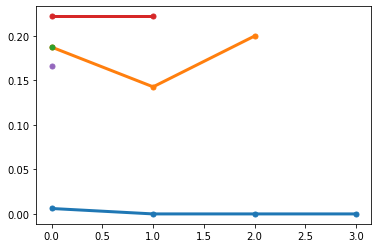

In [87]:

plt.plot(repo1['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo4['testing_status'], linewidth=3, marker='o', markersize=5)
plt.plot(repo5['testing_status'], linewidth=3, marker='o', markersize=5)


In [88]:
repo1['Maintainability'] = repo1['code_quality'] * pc1
repo1['Reliability'] = repo1['testing_status'] * pc2
repo1['total'] = repo1['Maintainability'] + repo1['Reliability']

repo2['Maintainability'] = repo2['code_quality'] * pc1
repo2['Reliability'] = repo2['testing_status'] * pc2
repo2['total'] = repo2['Maintainability'] + repo2['Reliability']

repo3['Maintainability'] = repo3['code_quality'] * pc1
repo3['Reliability'] = repo3['testing_status'] * pc2
repo3['total'] = repo3['Maintainability'] + repo3['Reliability']


repo4['Maintainability'] = repo4['code_quality'] * pc1
repo4['Reliability'] = repo4['testing_status'] * pc2
repo4['total'] = repo4['Maintainability'] + repo4['Reliability']


repo5['Maintainability'] = repo5['code_quality'] * pc1
repo5['Reliability'] = repo5['testing_status'] * pc2
repo5['total'] = repo5['Maintainability'] + repo5['Reliability']

In [89]:
repo1

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.867209,0.033875,0.815718,0,0,0.012195,fga-eps-mds-2022.1-EuPescador-UserInterface,devel,206834,0.566545,0.006098,0.283272,0.003049,0.286321
1,0.862745,0.029412,0.843137,0,0,0.000000,fga-eps-mds-2022.1-EuPescador-UserInterface,v2.1.0,27108,0.572647,0.000000,0.286324,0.000000,0.286324
2,0.862745,0.029412,0.843137,0,0,0.000000,fga-eps-mds-2022.1-EuPescador-UserInterface,v2.2.0,27340,0.572647,0.000000,0.286324,0.000000,0.286324
3,0.870370,0.037037,0.796296,0,0,0.000000,fga-eps-mds-2022.1-EuPescador-UserInterface,v2.3.0,31296,0.562222,0.000000,0.281111,0.000000,0.281111


(0.1, 1.1)

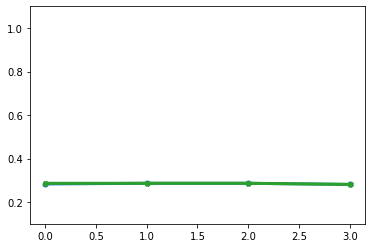

In [90]:
plt.plot(repo1['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo1['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo1['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)

In [91]:
repo2

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.833333,0.0,0.944444,0,0,0.375000,fga-eps-mds-2022.1-EuPescador-Web,main,58346,0.586667,0.187500,0.293333,0.093750,0.387083
1,0.828571,0.0,0.942857,0,0,0.285714,fga-eps-mds-2022.1-EuPescador-Web,v1.5.0,7200,0.584571,0.142857,0.292286,0.071429,0.363714
2,0.828571,0.0,0.942857,0,0,0.400000,fga-eps-mds-2022.1-EuPescador-Web,v1.6.0,7142,0.584571,0.200000,0.292286,0.100000,0.392286


(0.1, 1.1)

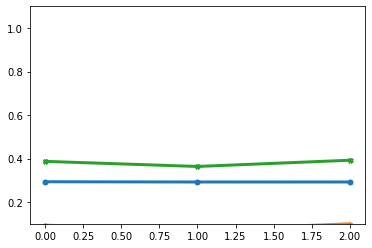

In [92]:
plt.plot(repo2['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo2['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo2['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)


In [93]:
repo3

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.5,0.125,1.0,0,0,0.375,fga-eps-mds-2022.1-EuPescador-FishWiki,v1.2.0,772,0.53625,0.1875,0.268125,0.09375,0.361875


(0.1, 1.1)

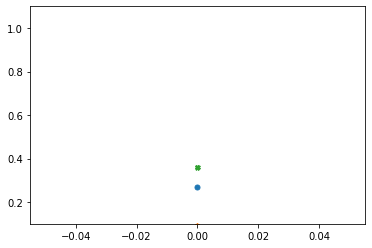

In [94]:
plt.plot(repo3['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo3['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo3['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)


In [95]:
repo4

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.555556,0.111111,0.888889,0,0,0.444444,fga-eps-mds-2022.1-EuPescador-FishLog,v2.3.0,1048,0.513333,0.222222,0.256667,0.111111,0.367778
1,0.555556,0.111111,0.888889,0,0,0.444444,fga-eps-mds-2022.1-EuPescador-FishLog,v2.4.0,1054,0.513333,0.222222,0.256667,0.111111,0.367778


(0.1, 1.1)

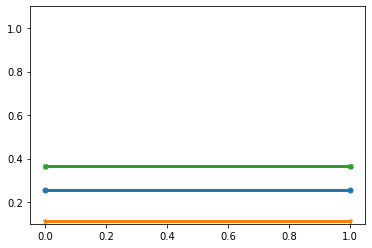

In [96]:
plt.plot(repo4['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo4['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo4['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)


In [97]:
repo5

,m1,m2,m3,m4,m5,m6,repository,version,ncloc,code_quality,testing_status,Maintainability,Reliability,total
0,0.666667,0.0,1.0,0,0,0.333333,fga-eps-mds-2022.1-EuPescador-User,v2.4.1,1215,0.55,0.166667,0.275,0.083333,0.358333


(0.1, 1.1)

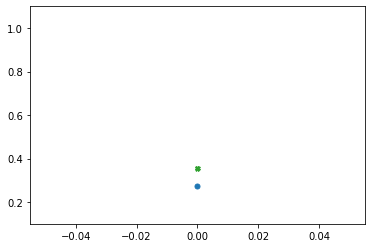

In [98]:
plt.plot(repo5['Maintainability'], linewidth=3, marker='o', markersize=5)
plt.plot(repo5['Reliability'], linewidth=3, marker='*', markersize=5)
plt.plot(repo5['total'], linewidth=3, marker='X', markersize=5)

plt.ylim(0.1,1.1)


### You must do the total plot and the statics analysis for the repository with more versions.

In [111]:
# Building descriptive statistics dataframe. You must replace YourRepoName for your repository name with more product versions.

metrics_df = pd.concat([repo1, repo2,repo3,repo4,repo5], ignore_index=True)

more_versions_repo = metrics_df[metrics_df['repository'] == 'fga-eps-mds-2022.1-EuPescador-UserInterface']

def get_characteristc_stats(repo_series):
    return {
        'mean': repo_series.mean(),
        'mode': repo_series.mode(),
        'median': repo_series.median(),
        'std': repo_series.std(),
        'var': repo_series.var(),
        'min': repo_series.min(),
        'max': repo_series.max()
    }

maintainability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Maintainability"]),
                                     columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

reliability_stats = pd.DataFrame(get_characteristc_stats(more_versions_repo["Reliability"]),
                                 columns=['mean', 'mode', 'median', 'std', 'var', 'min', 'max'])

In [112]:
print(maintainability_stats)

       mean      mode    median       std       var       min       max
0  0.284258  0.286324  0.284798  0.002543  0.000006  0.281111  0.286324


In [113]:
print(reliability_stats)

       mean  mode  median       std       var  min       max
0  0.000762   0.0     0.0  0.001524  0.000002  0.0  0.003049


### Plotting the aggregated quality characteristic indicator

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb774d68b70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb774cf42b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb774d68a20>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb774cf4940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb774cf4c88>,
 'means': []}

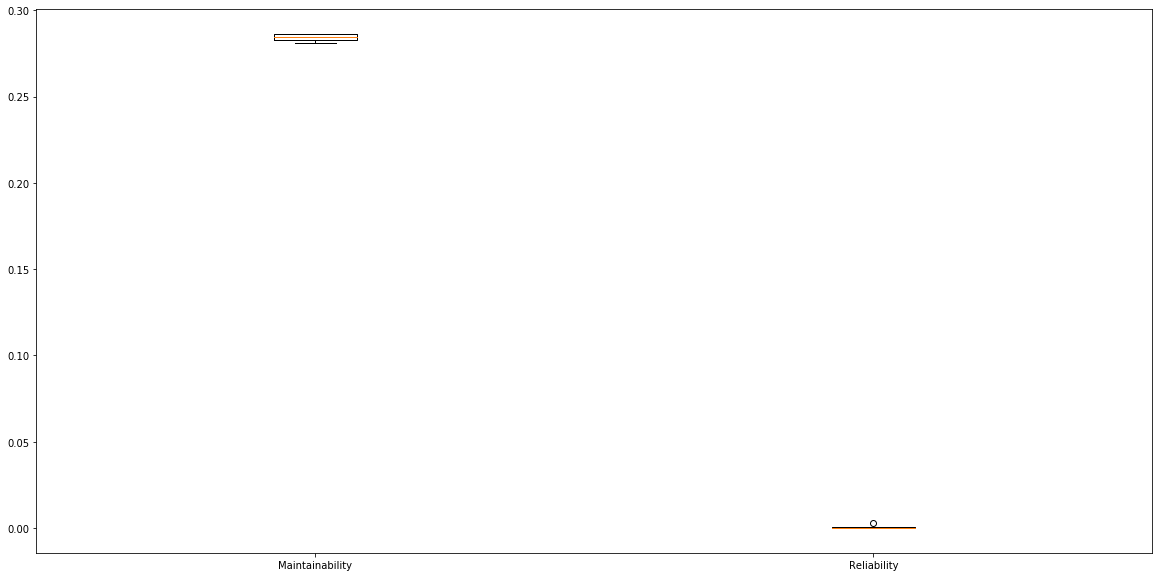

In [114]:
plt.figure(figsize=(20, 10))

# boxplot
plt.boxplot([more_versions_repo['Maintainability'], more_versions_repo['Reliability']],
labels=['Maintainability', 'Reliability'])

### Plotting the aggregated repository quality indicator

(0.1, 1)

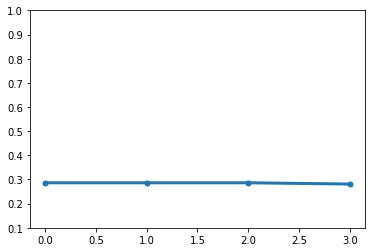

In [115]:
plt.plot(more_versions_repo['total'], linewidth=3, marker='o', markersize=5)

plt.ylim(.1,1)

In [120]:
# DATE FORMAT: MM-DD-YYYY-HH:MM:SS
currentDateTime = datetime.datetime.now().strftime("%m-%d-%Y-%H:%M:%S")

metrics_df.to_excel('./fga-eps-mds-2022-1-UserInterface-{}.xlsx'.format(currentDateTime), index = False)

metrics_df.to_csv('./fga-eps-mds-2022-1-UserInterface-{}.csv'.format(currentDateTime), index = False)